# 基于Python的Neo4j

## 安装Py2neo

In [1]:
!pip install py2neo

  Using cached https://files.pythonhosted.org/packages/0b/7e/ca368a8d8e288be1352d4e2df35da1e01f8aaffbf526695df71630bcb8a6/neotime-1.7.4.tar.gz
  Running setup.py bdist_wheel for py2neo: started
  Running setup.py bdist_wheel for py2neo: finished with status 'done'
  Stored in directory: C:\Users\ZhMin\AppData\Local\pip\Cache\wheels\86\7d\e3\35bd456d80e796ba1f98730b629352ebab5294c942e8fdd826
  Running setup.py bdist_wheel for neobolt: started
  Running setup.py bdist_wheel for neobolt: finished with status 'done'
  Stored in directory: C:\Users\ZhMin\AppData\Local\pip\Cache\wheels\8e\51\2b\623ff6538b9f4bc9368d568a5873b765f1178fe9af807d1296
  Running setup.py bdist_wheel for neotime: started
  Running setup.py bdist_wheel for neotime: finished with status 'done'
  Stored in directory: C:\Users\ZhMin\AppData\Local\pip\Cache\wheels\d4\b4\c4\ab867cd0ac9e667f8cd269f9364fd1cb8ee75fe50f5ce97c79
Successfully built py2neo neobolt neotime


In [2]:
# 导入相关的包
from py2neo import Graph,Node,Relationship,cypher
from pandas import DataFrame

### 节点的创建

In [3]:
##Graph  图
 
test_graph = Graph('http://localhost:7474',username='neo4j',password='test')
 
xiena = Node('kuailejiazu',name = '谢娜') 
test_graph.create(xiena) 
 
hejiong = Node('kuailejiazu',name = '何炅') 
test_graph.create(hejiong) 
 
weijia = Node('kuailejiazu',name = '维嘉') 
test_graph.create(weijia) 
 
haitao = Node('kuailejiazu',name = '海涛') 
test_graph.create(haitao ) 
 
wuxin = Node('kuailejiazu',name = '吴昕') 
test_graph.create(wuxin )

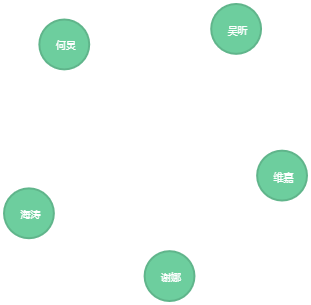

In [11]:
from IPython.display import Image
Image(filename='graph.png', width=400)

### 节点之间关系的建立
- 在创建新节点的同时，将关系建立起来
- 在已有节点的基础之上进行关系的建立

In [7]:
zhangjie = Node('kuailejiazu',name='张杰') 
test_graph.create(zhangjie) 
 
xiaofang = Node('kuailejiazu',name='小方')
test_graph.create(xiaofang) 
 
r = Relationship(zhangjie,'朋友',xiaofang) 
test_graph.create(r)

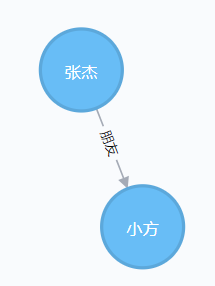

In [12]:
from IPython.display import Image
Image(filename='graph1.png', width=400)

In [28]:


test_graph.create(Relationship(xiena,'朋友',hejiong))
 
test_graph.create(Relationship(xiena,'朋友',weijia))
 
test_graph.create(Relationship(xiena,'朋友',haitao))
 
test_graph.create(Relationship(xiena,'朋友',wuxin))
 
test_graph.create(Relationship(xiena,'夫妻',zhangjie))
 
test_graph.create(Relationship(xiena,'朋友',xiaofang))


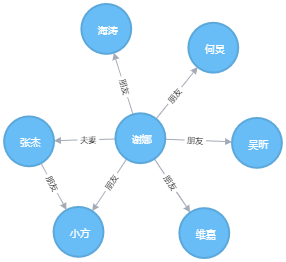

In [30]:
from IPython.display import Image
Image(filename='graph2.png', width=400)

### 节点的相关操作

1. 节点的查询

查询姓名为“张杰”的节点

In [17]:
a = test_graph.run("Match(n:kuailejiazu) where n.name = '张杰' return n").data() 
print (a)

[{'n': (_22:kuailejiazu {name: '\u5f20\u6770'})}]


2. 针对上面的例子，查出所有和”谢娜”节点是朋友关系的节点

In [31]:
b = test_graph.run("MATCH(n:kuailejiazu)-[:朋友]->(end:kuailejiazu) where n.name='谢娜' return end").data()
 
print(DataFrame(b))

              end
0  {'name': '小方'}
1  {'name': '吴昕'}
2  {'name': '海涛'}
3  {'name': '维嘉'}
4  {'name': '何炅'}


3. 统计图谱中有多少节点

In [32]:

zongshu = test_graph.run("match(n:kuailejiazu) return count(n)").data()
 
print(zongshu)

[{'count(n)': 7}]


### 属性的增加

In [37]:
xiena['time'] = '1981/5/6'
 
print(xiena['name'])
 
print(xiena['time'])

谢娜
1981/5/6
